In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

# Path for all the results
path="/home/ubuntu/NSProject/dataset/dataset-new/curated/core-periphery"

def extractorYear(year):
    return(int(str(year)[:4]))

def extractorWeek(year):
    return(int(str(year)[4:]))

In [2]:
all_files = glob.glob(path + "/*/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

In [3]:
frame["year"]=frame.week_no.apply(extractorYear)
frame["week"]=frame.week_no.apply(extractorWeek)
frame["ratio"] = frame.core_count / frame.network_size
final1 = frame.sort_values(by=['year','week'])

In [4]:
extra = final1[((final1.year == 2022) & (final1.week <= 1)) | ((final1.year == 2022) & (final1.week >= 34))]

In [5]:
extra = final1[((final1.year == 2018) & (final1.week < 26)) | ((final1.year == 2022) & (final1.week > 34))]
df = pd.merge(final1, extra, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)

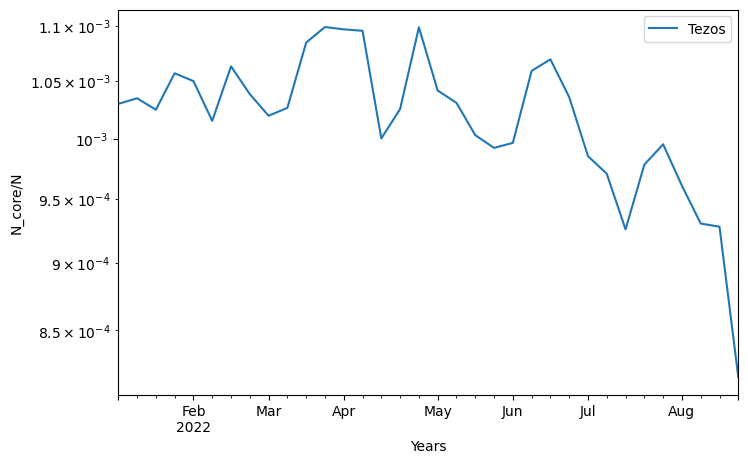

In [6]:
# Determine the date
df['date'] = pd.to_datetime(df.assign(day=1, month=1)[['year', 'month', 'day']])+pd.to_timedelta(df.week*7, unit='days')

# Plot
fig, ax = plt.subplots()
plt.yscale("log")
df.plot(x='date', y='ratio', ax=ax, figsize=(8,5))
ax.set_xlabel('Years')
ax.set_ylabel('N_core/N')
ax.legend(['Tezos'])